In [1]:
import pandas as pd
import numpy as np
import matplotlib as mtpl
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import itertools
from sklearn.feature_selection import SelectKBest, chi2
from IPython.core.display import display, HTML
from sklearn.cluster import KMeans
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics

display(HTML("<style>.container { width:100% !important; }</style>"))

## Task 2 using happniness

#### Load and scale

In [2]:
happiness = pd.read_csv('happiness.csv')
happiness = happiness.loc[:, happiness.columns != 'country']
minmax_scale = preprocessing.MinMaxScaler().fit(happiness)
happiness[[c for c in happiness.columns]] = minmax_scale.transform(happiness)
happiness.head()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"GINI index (World Bank estimate), average 2000-16","Unemployment, total (% of total labor force) (modeled ILO estimate)","Population, total",Total tax and contribution rate (% of profit),GDP growth (annual %)
0,0.166667,0.367801,0.523649,0.764567,0.786385,0.370338,0.308105,0.872390,0.327263,0.288078,0.242555,0.570025,0.372007,0.338456,0.277816,0.222289,0.452554,0.001981,0.117275,0.482384
1,0.583333,0.533754,0.557490,0.711498,0.813615,0.470885,0.147836,0.840628,0.420115,0.338615,0.312747,0.565744,0.393986,0.397093,0.241612,0.222289,0.377807,0.001929,0.094664,0.399624
2,0.666667,0.351960,0.559846,0.675478,0.820188,0.512697,0.190086,0.858528,0.466530,0.473709,0.283453,0.601575,0.393481,0.545089,0.421819,0.222289,0.449668,0.001925,0.073259,0.392001
3,0.750000,0.401813,0.563775,0.482763,0.826760,0.654494,0.294128,0.881798,0.554810,0.465973,0.459107,0.668341,0.428090,0.674364,0.471039,0.222289,0.496537,0.001921,0.072957,0.405976
4,0.833333,0.362571,0.568742,0.502582,0.833333,0.612021,0.237023,0.884253,0.560763,0.498007,0.468062,0.651068,0.436496,0.700231,0.515825,0.222289,0.484704,0.001915,0.088936,0.414143


#### Create categorical feature as the target

In [152]:
happiness['Democratic Level'] = ['a' if d > 0.7 else 'c' if d < 0.45 else 'b' for d in happiness['Democratic Quality']]
democracy = happiness.copy()
democracy = democracy.loc[:, democracy.columns != 'Democratic Quality']
democracy.head()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"GINI index (World Bank estimate), average 2000-16","Unemployment, total (% of total labor force) (modeled ILO estimate)","Population, total",Total tax and contribution rate (% of profit),GDP growth (annual %),Democratic Level
0,0.166667,0.367801,0.523649,0.764567,0.786385,0.370338,0.308105,0.872390,0.327263,0.288078,0.242555,0.372007,0.338456,0.277816,0.222289,0.452554,0.001981,0.117275,0.482384,b
1,0.583333,0.533754,0.557490,0.711498,0.813615,0.470885,0.147836,0.840628,0.420115,0.338615,0.312747,0.393986,0.397093,0.241612,0.222289,0.377807,0.001929,0.094664,0.399624,b
2,0.666667,0.351960,0.559846,0.675478,0.820188,0.512697,0.190086,0.858528,0.466530,0.473709,0.283453,0.393481,0.545089,0.421819,0.222289,0.449668,0.001925,0.073259,0.392001,b
3,0.750000,0.401813,0.563775,0.482763,0.826760,0.654494,0.294128,0.881798,0.554810,0.465973,0.459107,0.428090,0.674364,0.471039,0.222289,0.496537,0.001921,0.072957,0.405976,b
4,0.833333,0.362571,0.568742,0.502582,0.833333,0.612021,0.237023,0.884253,0.560763,0.498007,0.468062,0.436496,0.700231,0.515825,0.222289,0.484704,0.001915,0.088936,0.414143,b


#### Explore features

In [22]:
def explore_features(df, feature, ax):           
    zipped = zip(['a', 'b', 'c'], ('blue', 'red', 'green'))   
    ax.set_title(feature)
    for label, color in zipped:
        ax.hist(df[feature][df['Democratic Level'] == label], alpha=0.2, color=color, bins=15)

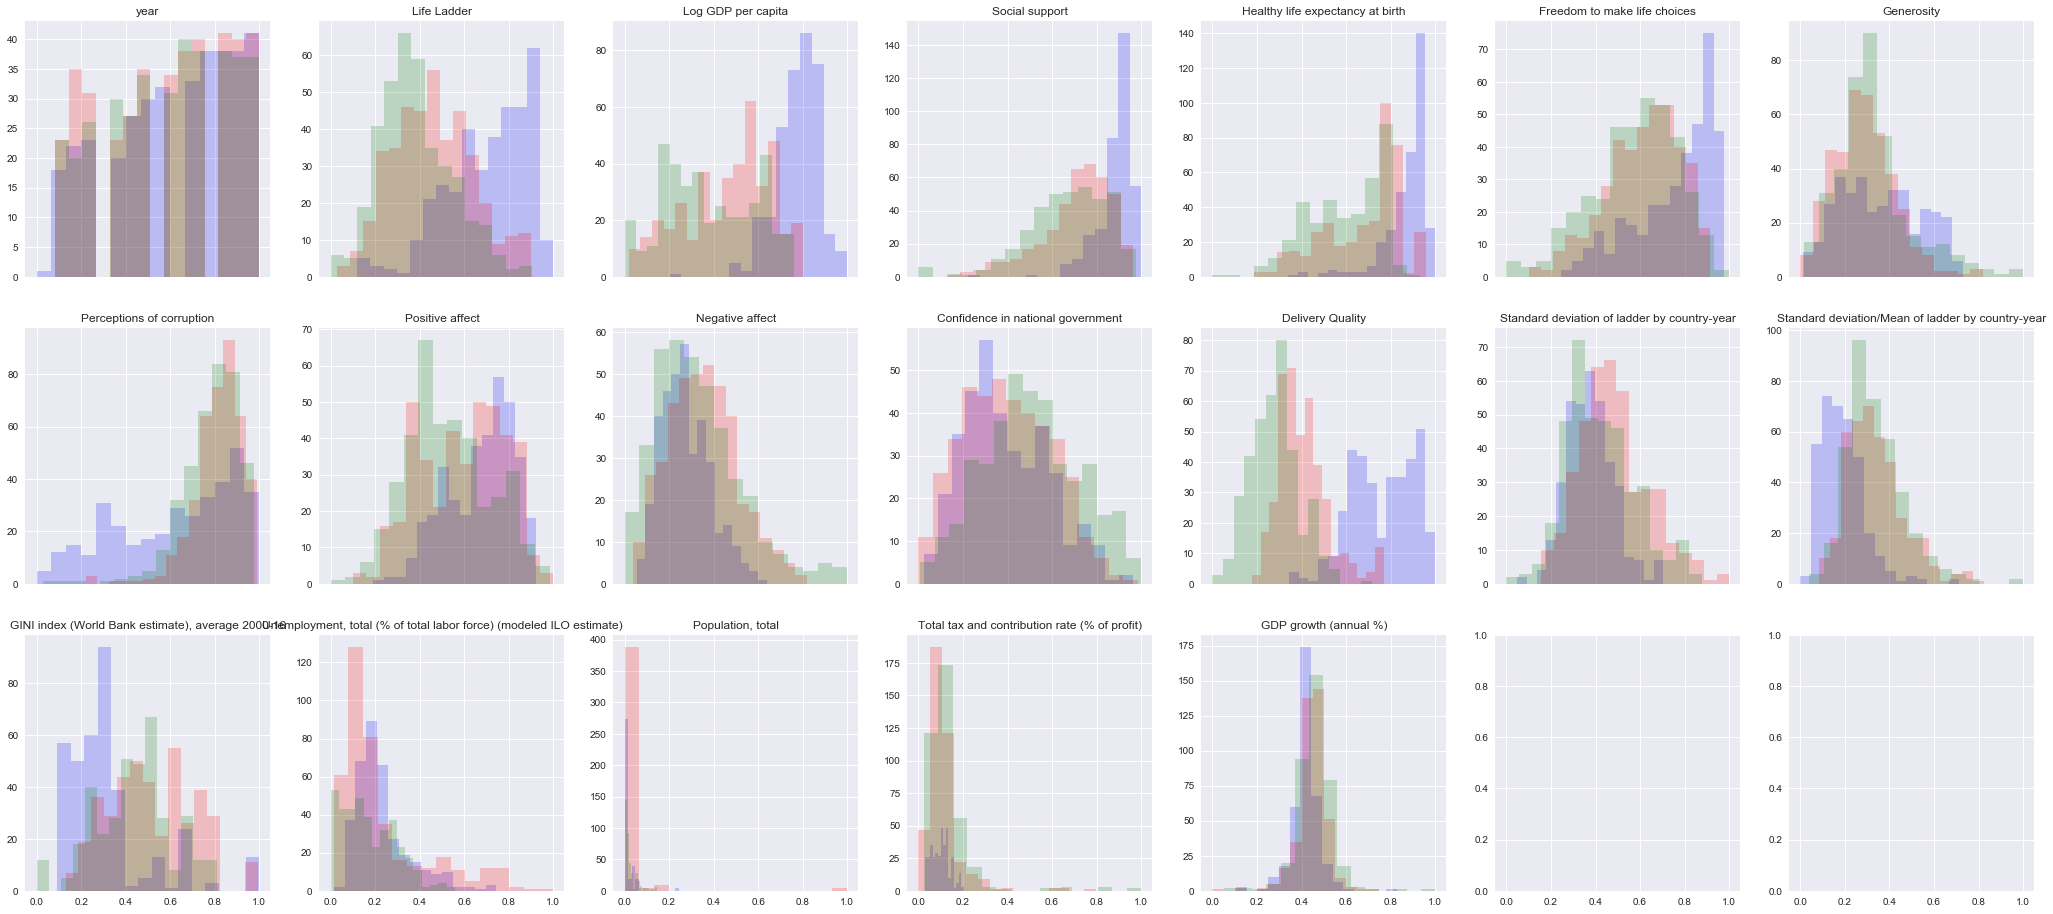

In [23]:
f, ax = plt.subplots(3, 7, figsize=(36, 16), sharex=True)
feature_ax = [(democracy.columns[i], ax[i//7][i%7]) for i in range(0, len(democracy.columns) - 1)]  

for feature, ax in feature_ax:
    explore_features(democracy, feature, ax)
plt.show()

* As can be see above the 6 features are better for discriminating features: Life Ladder, Log GDP per capita, Social support,  Delivery Quality, GINI index (World Bank estimate), average 2000-16.

In [153]:
features = [
    'Life Ladder', 
    'Log GDP per capita', 
    'Social support',
    'Freedom to make life choices',
    'Delivery Quality', 
    'GINI index (World Bank estimate), average 2000-16'
]
democracy[features].head()

,Life Ladder,Log GDP per capita,Social support,Freedom to make life choices,Delivery Quality,"GINI index (World Bank estimate), average 2000-16"
0,0.367801,0.523649,0.764567,0.370338,0.372007,0.222289
1,0.533754,0.557490,0.711498,0.470885,0.393986,0.222289
2,0.351960,0.559846,0.675478,0.512697,0.393481,0.222289
3,0.401813,0.563775,0.482763,0.654494,0.428090,0.222289
4,0.362571,0.568742,0.502582,0.612021,0.436496,0.222289


#### Feature selection

In [124]:
y = democracy['Democratic Level']
selectors = [SelectKBest(chi2, i) for i in range(1,7)]
x_with_k_best_features = [s.fit_transform(democracy[features], y) for s in selectors]

features_chosen = [list(zip(s.get_support(), features)) for s in selectors]
features_chosen

[[(False, 'Life Ladder'),
  (False, 'Log GDP per capita'),
  (False, 'Social support'),
  (False, 'Freedom to make life choices'),
  (True, 'Delivery Quality'),
  (False, 'GINI index (World Bank estimate), average 2000-16')],
 [(False, 'Life Ladder'),
  (True, 'Log GDP per capita'),
  (False, 'Social support'),
  (False, 'Freedom to make life choices'),
  (True, 'Delivery Quality'),
  (False, 'GINI index (World Bank estimate), average 2000-16')],
 [(True, 'Life Ladder'),
  (True, 'Log GDP per capita'),
  (False, 'Social support'),
  (False, 'Freedom to make life choices'),
  (True, 'Delivery Quality'),
  (False, 'GINI index (World Bank estimate), average 2000-16')],
 [(True, 'Life Ladder'),
  (True, 'Log GDP per capita'),
  (False, 'Social support'),
  (False, 'Freedom to make life choices'),
  (True, 'Delivery Quality'),
  (True, 'GINI index (World Bank estimate), average 2000-16')],
 [(True, 'Life Ladder'),
  (True, 'Log GDP per capita'),
  (True, 'Social support'),
  (False, 'Freedo

#### Tree

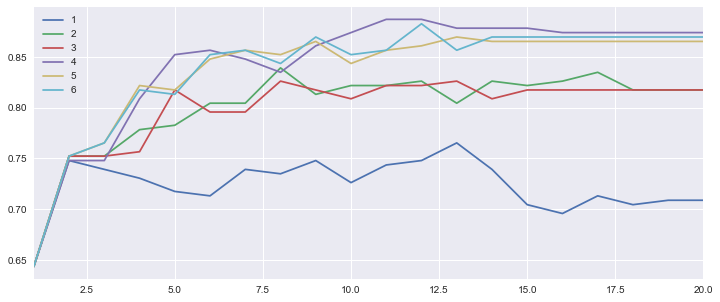

In [134]:
tree_matrix_df = pd.DataFrame(data={str(f):[0] * 20 for f in range(1,7)})

for f in range(1, 7):
    x = x_with_k_best_features[f-1]
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.2)
    for d in range(1, 21):
        tree = DecisionTreeClassifier(max_depth=d, random_state=1)
        score = tree.fit(x_train, y_train).score(x_test, y_test)
        tree_matrix_df.iloc[d-1, f-1] = score

tree_matrix_df.index += 1
_ = tree_matrix_df.plot(figsize=[12,5])

plt.show()
# title, label, etc needed.

* The line for 4 features present best accuracy, wich a peak value at depth=11. This value is chosen for cross model comparison
* Mutiple lines shows a bit overfit after depth=12


In [135]:
tree_matrix_df[tree_matrix_df.index==11]

,1,2,3,4,5,6
11,0.743478,0.821739,0.821739,0.886957,0.856522,0.856522


#### KNN

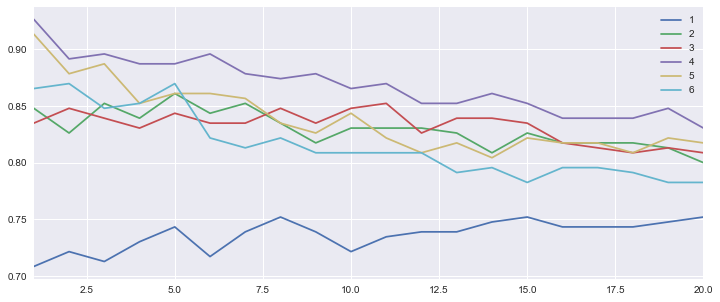

In [126]:
knn_matrix_df = pd.DataFrame(data={str(f):[0] * 20 for f in range(1,7)})

for f in range(1, 7):
    x = x_with_k_best_features[f-1]
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.2)
    for d in range(1, 21):
        tree =KNeighborsClassifier(n_neighbors=d, metric='euclidean')
        score = tree.fit(x_train, y_train).score(x_test, y_test)
        knn_matrix_df.iloc[d-1, f-1] = score

knn_matrix_df.index += 1
_ = knn_matrix_df.plot(figsize=[12,5])
plt.show()   

* The 4 features line present the best accuracy. 
* Most lines present the best accuracy at k=1 except the line for 1 feature. This value is chosen for cross model comparison.

In [147]:
knn_matrix_df[knn_matrix_df.index==1]

,1,2,3,4,5,6
1,0.708696,0.847826,0.834783,0.926087,0.913043,0.865217


In [141]:
nb = GaussianNB()

nb_score=[]
for f in range(1, 7):
    x = x_with_k_best_features[f-1]
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.2)
    score = nb.fit(x_train, y_train).score(x_test, y_test)
    nb_score.append(score)
    
nb_score    

[0.75652173913043474,
 0.73043478260869565,
 0.71304347826086956,
 0.75652173913043474,
 0.73913043478260865,
 0.74347826086956526]

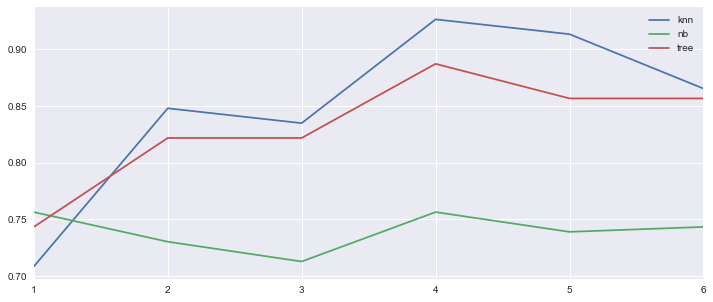

In [151]:
multiple_model_df = pd.DataFrame(data={'nb':nb_score, 
                                       'knn': knn_matrix_df[knn_matrix_df.index==1].values[0], 
                                       'tree': tree_matrix_df[tree_matrix_df.index==11].values[0]})
multiple_model_df.index += 1
multiple_model_df.plot(figsize=[12,5])

plt.show()

### Task 3



In [2]:
happiness = pd.read_csv('happiness.csv')
happiness = happiness.loc[:, happiness.columns != 'country']
happiness = happiness.drop(['year', 'sd_m_country_year', 'sd_country_year', 'pop', 'support', 'choice', 'democoratic', 'delivery'], axis=1) # explain why such features have been dropped
happiness.head()

,happiness,gdp_pc,life_expected,generosity,corruption,positive,negative,gov_confidence,gini,unemployment,tax,gdp_g
0,4.634252,9.077331,65.800003,-0.014393,0.874700,0.552678,0.246335,0.300681,0.30325,15.966,46.3,5.98
1,5.510124,9.246655,66.959999,-0.172262,0.847675,0.606636,0.271393,0.364894,0.30325,13.376,38.8,1.42
2,4.550648,9.258445,67.239998,-0.130645,0.862905,0.633609,0.338379,0.338095,0.30325,15.866,31.7,1.00
3,4.813763,9.278104,67.519997,-0.028162,0.882704,0.684911,0.334543,0.498786,0.30325,17.490,31.6,1.77
4,4.606651,9.302960,67.800003,-0.084411,0.884793,0.688370,0.350427,0.506978,0.30325,17.080,36.9,2.22


#### Scale

In [3]:
minmax_scale = preprocessing.MinMaxScaler().fit(happiness)
happiness[happiness.columns] = minmax_scale.transform(happiness)
happiness.head()

,happiness,gdp_pc,life_expected,generosity,corruption,positive,negative,gov_confidence,gini,unemployment,tax,gdp_g
0,0.367801,0.523649,0.786385,0.308105,0.872390,0.327263,0.288078,0.242555,0.222289,0.452554,0.117275,0.482384
1,0.533754,0.557490,0.813615,0.147836,0.840628,0.420115,0.338615,0.312747,0.222289,0.377807,0.094664,0.399624
2,0.351960,0.559846,0.820188,0.190086,0.858528,0.466530,0.473709,0.283453,0.222289,0.449668,0.073259,0.392001
3,0.401813,0.563775,0.826760,0.294128,0.881798,0.554810,0.465973,0.459107,0.222289,0.496537,0.072957,0.405976
4,0.362571,0.568742,0.833333,0.237023,0.884253,0.560763,0.498007,0.468062,0.222289,0.484704,0.088936,0.414143


In [4]:
all_combinations = []
for subset in itertools.combinations(happiness.columns, 3):
    all_combinations.append(subset)        
all_combinations

[('happiness', 'gdp_pc', 'life_expected'),
 ('happiness', 'gdp_pc', 'generosity'),
 ('happiness', 'gdp_pc', 'corruption'),
 ('happiness', 'gdp_pc', 'positive'),
 ('happiness', 'gdp_pc', 'negative'),
 ('happiness', 'gdp_pc', 'gov_confidence'),
 ('happiness', 'gdp_pc', 'gini'),
 ('happiness', 'gdp_pc', 'unemployment'),
 ('happiness', 'gdp_pc', 'tax'),
 ('happiness', 'gdp_pc', 'gdp_g'),
 ('happiness', 'life_expected', 'generosity'),
 ('happiness', 'life_expected', 'corruption'),
 ('happiness', 'life_expected', 'positive'),
 ('happiness', 'life_expected', 'negative'),
 ('happiness', 'life_expected', 'gov_confidence'),
 ('happiness', 'life_expected', 'gini'),
 ('happiness', 'life_expected', 'unemployment'),
 ('happiness', 'life_expected', 'tax'),
 ('happiness', 'life_expected', 'gdp_g'),
 ('happiness', 'generosity', 'corruption'),
 ('happiness', 'generosity', 'positive'),
 ('happiness', 'generosity', 'negative'),
 ('happiness', 'generosity', 'gov_confidence'),
 ('happiness', 'generosity', '

In [5]:
all_combinations_df = pd.DataFrame()
for c in all_combinations:
    all_combinations_df = all_combinations_df.append({f: 1 if f in c else 0 for f in happiness.columns}, ignore_index=True)
    
all_combinations_df['score'] = 0

all_combinations_df.head()

,corruption,gdp_g,gdp_pc,generosity,gini,gov_confidence,happiness,life_expected,negative,positive,tax,unemployment,score
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0


In [6]:
for i, row in all_combinations_df.iterrows():
    if(i%10 == 0):
        print(str(i) + '/' + str(len(all_combinations_df)))
    
    features = [f for f in happiness.columns if row[f] == 1]
    km = KMeans(n_clusters=3, init='random')
    km.fit(happiness[features].values)
    prediction = km.predict(happiness[features].values)
    score = metrics.silhouette_score(happiness[features], prediction)     
    all_combinations_df.iloc[i, all_combinations_df.columns.get_loc("score")] = score    
    
all_combinations_df#.head()

0/220
10/220
20/220
30/220
40/220
50/220
60/220
70/220
80/220
90/220
100/220
110/220
120/220
130/220
140/220
150/220
160/220
170/220
180/220
190/220
200/220
210/220


,corruption,gdp_g,gdp_pc,generosity,gini,gov_confidence,happiness,life_expected,negative,positive,tax,unemployment,score
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.450251
1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.410904
2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.431773
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.389089
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.355431
5,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.349306
6,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.415349
7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.393506
8,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.426456
9,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.425713


In [82]:
all_combinations_df_high_score = all_combinations_df[all_combinations_df.score > 0.4843]
all_combinations_df_high_score

,corruption,gdp_g,gdp_pc,generosity,gini,gov_confidence,happiness,life_expected,negative,positive,tax,unemployment,score
56,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.484575
95,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.484777
199,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.498451
219,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.552736


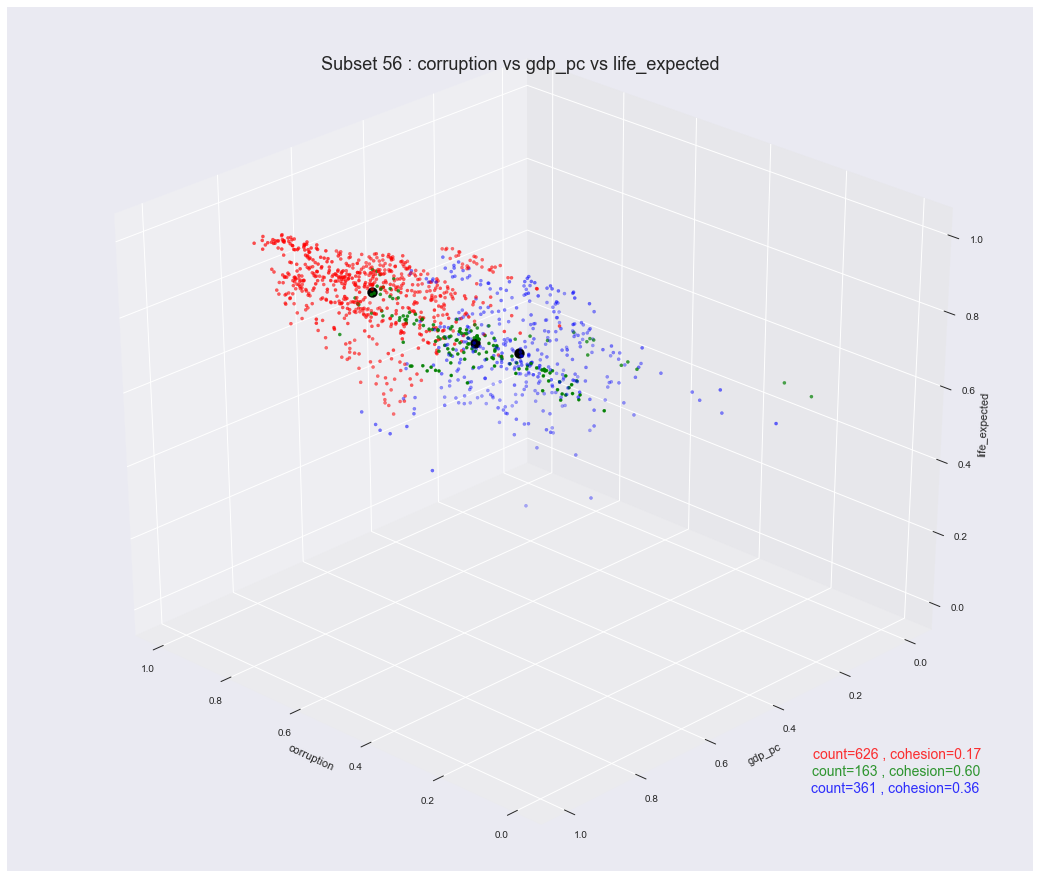

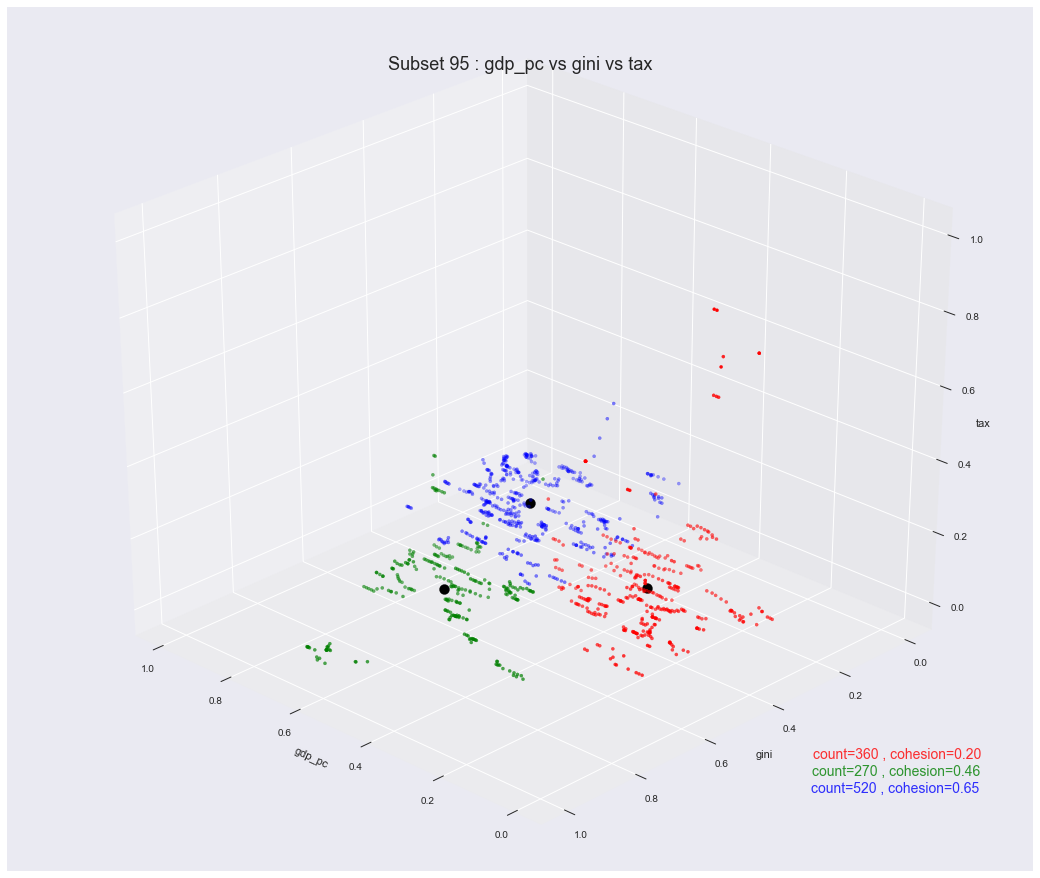

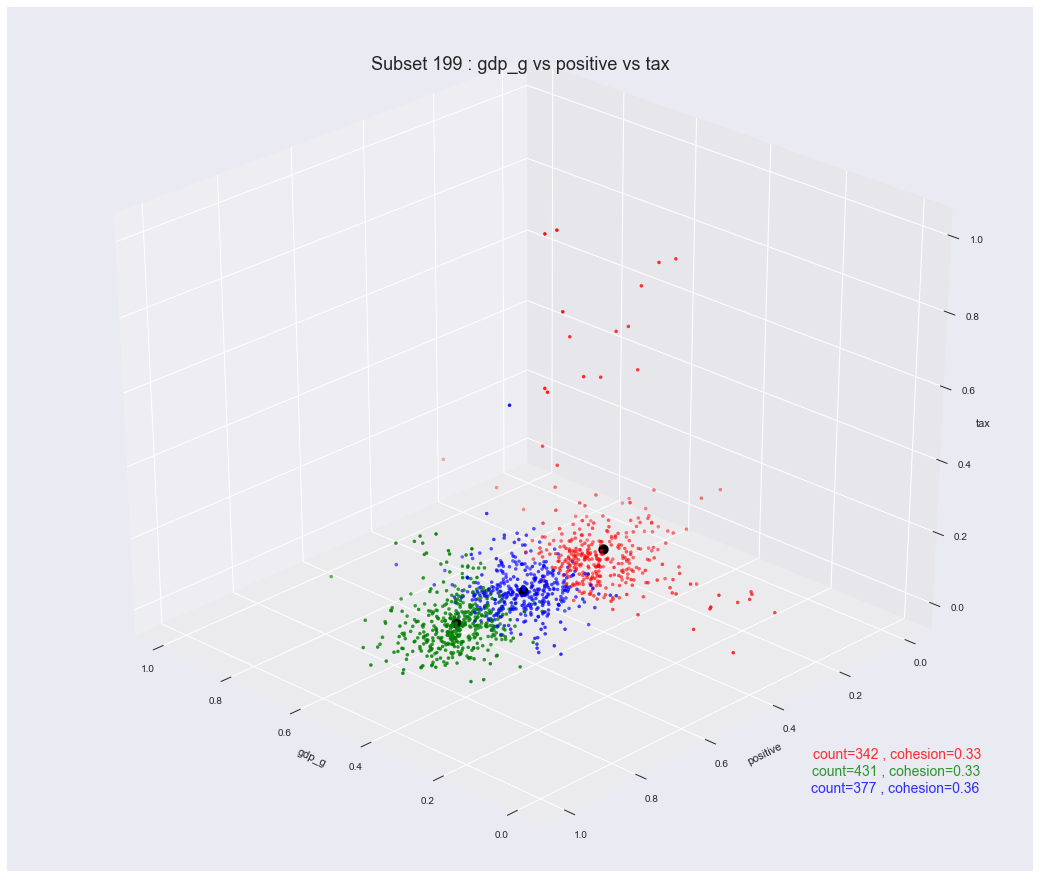

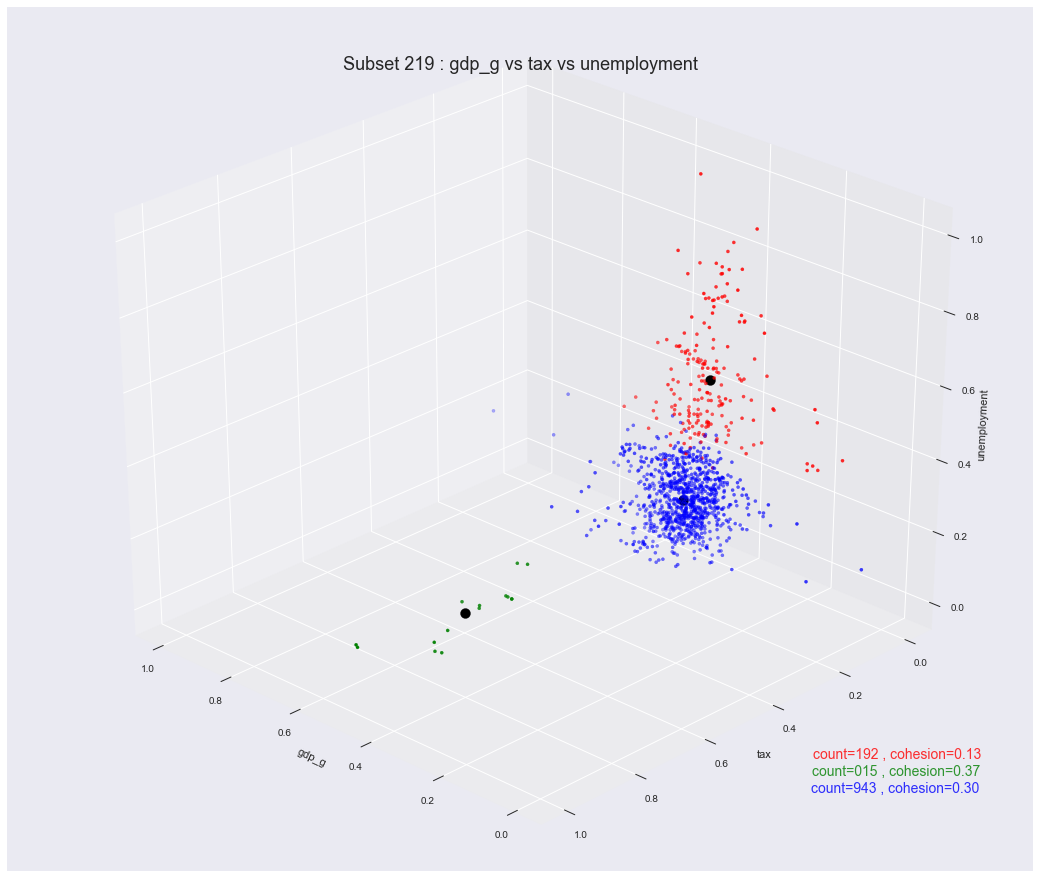

In [84]:
colors = {0:'r',1:'g', 2:'b'}

for i, row in all_combinations_df_high_score.iterrows():    
    
    # fit
    features = [f for f in all_combinations_df_high_score.columns if row[f] == 1]
    km = KMeans(n_clusters=3, init='random')
    km.fit(happiness[features].values)
    prediction = km.predict(happiness[features].values)
    
    # plot
    ax = Axes3D(plt.figure(figsize=(15, 12)), rect=[.01, 0, 0.95, 1], elev=30, azim=134)
    ax.scatter(happiness[features[0]], happiness[features[1]], happiness[features[2]], c=[colors[p] for p in prediction], s=10)
    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])
    ax.set_zlabel(features[2])        
    ax.set_title( 'Subset ' + str(i) + ' : ' + ' vs '.join(features), fontsize = 18)
    
    happiness['cluster'] = prediction
    for cluster in [0, 1, 2]:
        
        # centorid
        x = happiness[happiness.cluster==cluster][features[0]].mean()
        y = happiness[happiness.cluster==cluster][features[1]].mean()
        z = happiness[happiness.cluster==cluster][features[2]].mean()    
        centroid = [x, y, z]
        ax.scatter([x], [y], [z], c='k', s=100)
        
        # cohesion
        sum_of_dist_to_centroid=0
        clustered_df = happiness[happiness.cluster==cluster]
        clustered_df = clustered_df[features]
        for i, row in clustered_df.iterrows():
            sum_of_dist_to_centroid += linalg.norm(np.array(centroid) - np.array([row[features[0]], row[features[1]], row[features[0]]]))
        cohesion = sum_of_dist_to_centroid / len(clustered_df)
        
        txt = ' , '.join(
            [
                "count=" + "{:03d}".format(len(clustered_df)),
                "cohesion=" + "{:.2f}".format(cohesion)
            ]
        )
        ax.text(0, 0.2, -1 * cluster/20 - 0.35, txt, color=colors[cluster], alpha=0.8, fontsize=14)
        
        #seperation
        
    
    plt.show()